## KrisFace GAN

Implementing a controlled (vs white noise) GAN on my face with the fastai framework. Goal is face puppetry.

Interesting [blog](https://dejanbatanjac.github.io/2019/08/16/Momentum.html)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
from fastai.callbacks import *

import pathlib
from PIL import Image

In [3]:
path = pathlib.Path.cwd()/'data/krisFace/'
path

WindowsPath('C:/Users/Awesome Freelancer/Desktop/KJ/krisFaceGan/data/krisFace')

### Data Preprocessing

In [4]:
path_og = path/'original'
path_land = path/'landmarks'
path_land_lr = path/'landmarks-96'
path_land_mr = path/'landmarks-256'
path_og_lr = path/'original-96' #low res
path_og_mr = path/'original-256' #medium res

In [46]:
il_og = ImageList.from_folder(path_og)
il_land = ImageList.from_folder(path_land)

In [9]:
il.items[0]

WindowsPath('C:/Users/Awesome Freelancer/Desktop/KJ/krisFaceGan/data/krisFace/original/1.png')

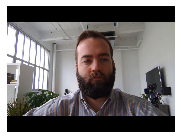

In [12]:
il[200].show()

In [15]:
im = PIL.Image.open(path_og/'304.png')
im = PIL.Image.open(il.items[0])

In [18]:
# print(im.size), im #640x480

cropping black bars

In [19]:
#  For example, a rectangle covering all of an 800x600 pixel image is written as (0, 0, 800, 600).
#  if you want the top left 46x46, use (0, 0, 46, 46).
im = PIL.Image.open(il.items[0])
im = im.crop([0, 60, 640, 420])
im.size

(640, 360)

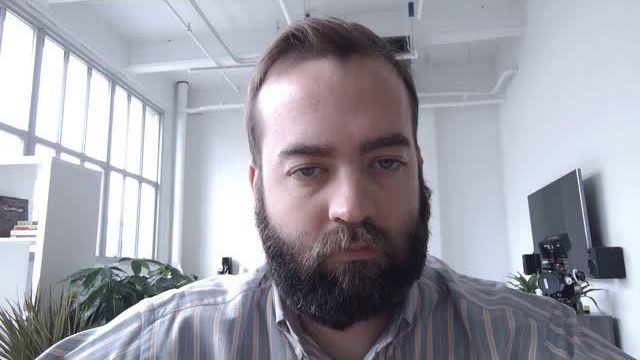

In [20]:
im

In [58]:
#want to resize my og images to 96 (lr) and 256 (mr)
def resize_one(fn, img, path, size):
    dest = path/fn.relative_to(path_land) 
    print(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    img = img.crop([0, 60, 640, 420])
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=95) #95 is most, 75 is default

In [59]:
#resize landmarks and original pics 
sets = [(path_og_lr, 96), (path_og_mr, 256)]

for p,size in sets:
    if p.exists():
        print(f'done prior')
    else:
        for i, img in enumerate(il_og.items):
            resize_one(il_og.items[i], il_og[i], path=p, size=size )

# #TODO: reset the relative path in resize_one fn so don't have to flip 
# sets = [(path_land_lr, 96), (path_land_mr, 256)]
# for p,size in sets:
#     if p.exists():
#         print(f'done prior')
#     else:
#         for i, img in enumerate(il_land.items):
#             resize_one(il_land.items[i], il_land[i], path=p, size=size )


C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\1.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\10.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\100.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\101.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\102.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\103.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\104.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\105.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\106.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\107.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\108.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\k

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\185.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\186.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\187.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\188.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\189.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\19.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\190.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\191.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\192.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\193.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\194.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\270.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\271.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\272.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\273.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\274.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\275.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\276.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\277.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\278.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\279.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\28.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\356.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\357.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\358.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\359.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\36.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\360.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\361.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\362.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\363.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\364.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\365.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\441.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\442.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\443.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\444.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\445.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\446.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\447.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\448.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\449.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\45.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\450.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\527.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\528.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\529.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\53.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\530.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\531.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\532.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\533.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\534.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\535.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-96\536.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\126.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\127.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\128.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\129.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\13.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\130.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\131.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\132.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\133.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\134.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\135.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisF

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\210.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\211.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\212.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\213.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\214.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\215.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\216.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\217.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\218.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\219.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\22.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisF

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\296.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\297.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\298.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\299.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\3.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\30.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\300.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\301.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\302.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\303.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\304.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFac

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\380.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\381.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\382.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\383.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\384.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\385.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\386.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\387.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\388.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\389.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\39.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisF

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\465.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\466.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\467.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\468.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\469.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\47.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\470.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\471.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\472.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\473.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\474.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisF

C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\63.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\64.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\65.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\66.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\67.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\68.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\69.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\7.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\70.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\71.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data\krisFace\landmarks-256\72.png
C:\Users\Awesome Freelancer\Desktop\KJ\krisFaceGan\data

In [31]:
# # #create smaller og pics first time this nb is run
# sets = [(path_og_lr, 96), (path_og_mr, 256)]
# for p,size in sets:
#     if p.exists():
#         print(f'done previously')
#     if not p.exists():
#         print(f'resizing to {size} into {p}')
#         parallel(partial(resize_one, path=p, size=size), il.items)

Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\concurrent\futures\process.py", line 295, in _queue_management_worker
    shutdown_worker()
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\concurrent\futures\process.py", line 253, in shutdown_worker
    call_queue.put_nowait(None)
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\multiprocessing\queues.py", line 129, in put_nowait
    return self.put(obj, False)
  File "C:\Users\Awesome Freelancer\Miniconda3\envs\krisFaceGan\lib\multiprocessing\queues.py", line 83, in put
    raise Full
queue.Full



BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

(WindowsPath('C:/Users/Awesome Freelancer/Desktop/KJ/krisFaceGan/data/krisFace/original'),
 torch.Size([3, 480, 640]),
 None)

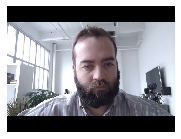

In [53]:
il = ImageList.from_folder(path_og)
src = ImageList.from_folder(path_land)
path_og, il[0].shape, il[0].show()

### Model Setup

In [54]:
arch = models.resnet34

In [60]:
src = (ImageImageList.from_folder(path_land_lr)
       .split_by_rand_pct(0.1, seed=42)
       .label_from_func(lambda x: path_og_lr/x.name))

(None, None)

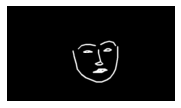

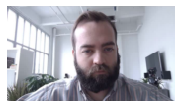

In [65]:
src.x[0].show(), src.y[0].show()

In superRes, he creates a resize fn. <br>
He squishes imgs and saves them in path_lr, already have my lowres imgs <br>
He creates an ImageList for LR data <br>
In his get_data fn, he pairs LR and HR w/ a lambda fn

In [66]:
tfms = get_transforms(do_flip=False, max_lighting=0.0, max_zoom=1.5, p_lighting=0)

In [94]:
def get_data(bs, size): 
    data = (src
           .transform(tfms, size=size, tfm_y=True)
           .databunch(bs=bs).normalize(do_y=True))
    
    data.c = 3 # three classes? 
    return data

In [68]:
bs, size = 32, 96

In [95]:
data = get_data(bs, size)

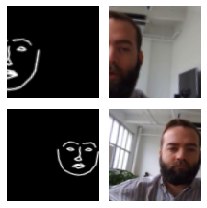

In [96]:
data.show_batch(ds_type=DatasetType.Train, rows=2, figsize=(3,3))

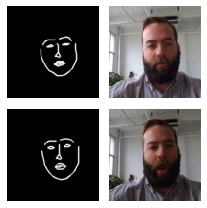

In [97]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(3,3))

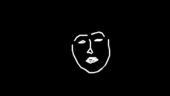

In [72]:
data.valid_ds.x[0]

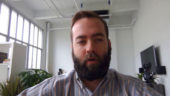

In [73]:
data.valid_ds.y[0]

# Train - Orig: Feature Loss

Want to deconv 4x up

In [108]:
t = data.valid_ds[0][1].data
t = torch.stack([t,t])

In [109]:
t.shape #same img stacked (hence dim0==2)

torch.Size([2, 3, 96, 96])

In [110]:
def gram_matrix(x):
    n,c,h,w = x.size() #num, channel, height, width
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [111]:
base_loss = F.l1_loss
#l1_loss is MSE, base_loss is now a fn

In [112]:
#vgg pretrained model using batchNorm (.features is the conv part of the vgg model, .classifier has dense layers)
from torchvision.models import vgg16_bn

vgg_m = vgg16_bn(True).features.cuda().eval()
requires_grad(vgg_m, False) #False means don't update weights and just use for loss

In [113]:
#enumerate through all the children of model and find maxPool layers
#that's where the grid size changes
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 22, 32, 42],
 [ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True)])

In [114]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [115]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,12])

# Train (feature loss)

## Low Res Training and Fine Tuning

#### LR Training

In [116]:
wd = 1e-3 #normally .1, default is .01, surprised he's using .001
learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     norm_type=NormType.Weight) #deleted blur=True
gc.collect();

torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([3

torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([32, 512, 144])
torch.Size([32, 512, 144])
torch.Size([32, 512, 36])
torch.Size([32, 512, 36])
torch.Size([32, 256, 576])
torch.Size([32, 256, 576])
torch.Size([3

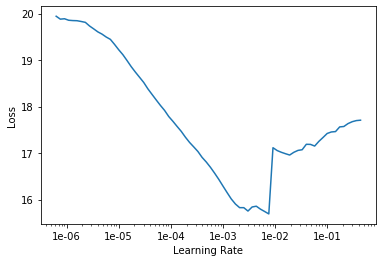

In [102]:
learn.lr_find()

learn.recorder.plot()

In [103]:
lr = 1e-3

In [117]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9, epochs=10):
    learn.fit_one_cycle(epochs, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=2, imgsize=5)

## Log:

Model_name            Epochs    Unfrozen?   LR
- krisFace-v2-1         200       No          1e-3


In [121]:
model_name = 'krisFace-v1'

epochs=10
lr=1e-3

In [ ]:
do_fit(f'{model_name}-1a', slice(lr), epochs=epochs)

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,9.314332,8.278929,1.222071,0.390279,0.515955,0.515746,1.158614,1.708456,2.767808,00:48
1,9.357628,8.191295,1.176695,0.387161,0.508622,0.512529,1.140334,1.698860,2.767093,00:47
2,9.352904,8.066267,1.113657,0.383716,0.508660,0.509237,1.120041,1.688365,2.742591,00:48
3,9.331872,8.139153,1.089750,0.371072,0.506947,0.507143,1.191403,1.723064,2.749774,00:47
4,9.415157,8.516473,1.093059,0.374181,0.526110,0.531944,1.273993,1.875044,2.842141,00:48
5,9.591707,8.531981,1.152841,0.377123,0.529290,0.534831,1.205845,1.848379,2.883672,00:48
6,9.615284,7.939102,1.017415,0.371373,0.503914,0.493040,1.111179,1.703580,2.738601,00:48
7,9.585595,8.001330,1.127253,0.383520,0.495080,0.504178,1.100388,1.667276,2.723636,00:49
8,9.446589,7.438049,0.894165,0.370184,0.478836,0.480965,0.993028,1.550497,2.670375,00:49


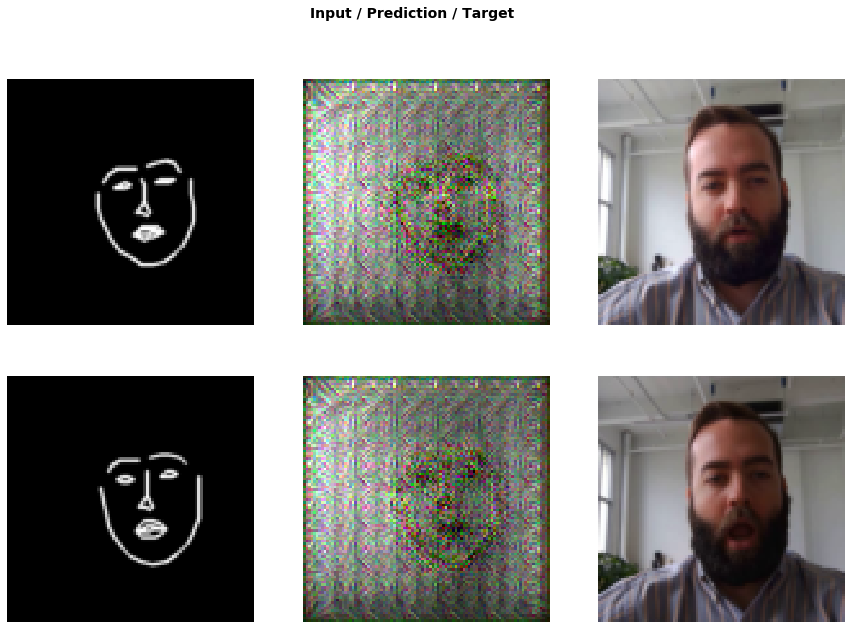

In [120]:
learn.show_results(rows=2, imgsize=5) #after 10 epochs, w/ early layers frozen

lol this has no chance!!!!

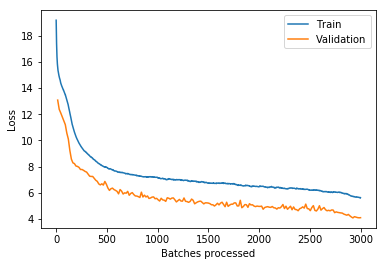

In [260]:
learn.recorder.plot_losses()

Above graph kinda shows it's headed towards another loss dropoff, could likely train more epochs

#### LR Fine Tuning

In [43]:
learn.load('krisFace-v2-1a')

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type FeatureLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Learner(data=ImageDataBunch;

Train: LabelList (486 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Valid: LabelList (54 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)

In [261]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


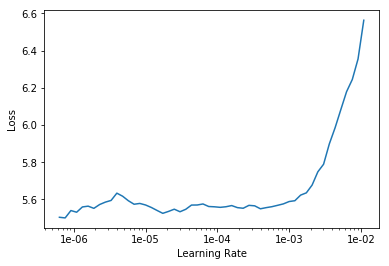

In [263]:
learn.lr_find()
learn.recorder.plot()

In [264]:
lr = 3e-3
epochs=200

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,5.230080,3.543550,0.388123,0.185117,0.188435,0.214454,0.425896,0.759848,1.381678,00:07
1,5.205318,3.540670,0.388056,0.185052,0.188106,0.214254,0.425134,0.759016,1.381053,00:08
2,5.198861,3.520965,0.387656,0.184630,0.187309,0.212409,0.423432,0.755879,1.369649,00:07
3,5.212379,3.533348,0.388375,0.185102,0.187587,0.213453,0.424634,0.757976,1.376221,00:07
4,5.202592,3.523622,0.386855,0.184669,0.187222,0.212655,0.424436,0.757034,1.370751,00:08
5,5.181557,3.527835,0.387619,0.184780,0.187196,0.213130,0.424604,0.757201,1.373304,00:08
6,5.233170,3.513199,0.387578,0.184475,0.186860,0.211934,0.423452,0.754546,1.364354,00:08
7,5.252338,3.520476,0.388373,0.184620,0.187035,0.212293,0.424113,0.756388,1.367653,00:08
8,5.237997,3.529470,0.389276,0.185007,0.187300,0.213053,0.424378,0.757962,1.372494,00:07
9,5.230461,3.525382,0.387703,0.184901,0.187441,0.212983,0.423928,0.757369,1.371058,00:07


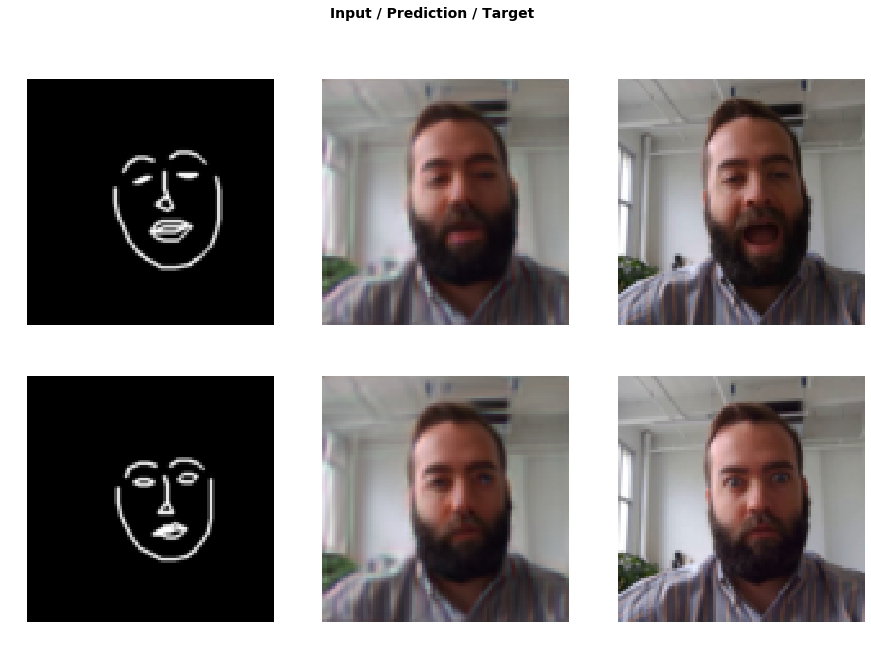

In [269]:
learn_log = [(f'{model_name}-1b', epochs, 'unfrozen', 3e-3)]
do_fit(f'{model_name}-1b', slice(1e-5,lr), epochs=epochs)

And for inferences the learn.export, learn.destroy and load_learner sequence will require even less RAM.

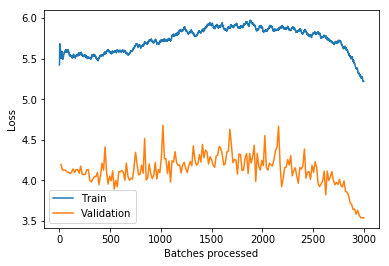

In [268]:
learn.recorder.plot_losses()

In [68]:
# learn.layer_groups

## Medium Rez Training and Fine Tuning
could probably redo, only did 20 epochs for training the outer layer before unfreezing and doing 200 epochs.

__Need to redo get_data, which explicitly references Low Rez path__

In [ ]:
bs, size = 6, 256

In [70]:
#double the size, so halve the bs
data = get_data(bs,size)

In [71]:
#reset the data to the larger size, freeze the first layers, and release the GPU
learn.data = data

In [76]:
learn.load('myFace-Generator-1c');

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type FeatureLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
learn_log = [('myFace-Generator-256a', 'frozen', 20, 1e-5, 3e-1)] #can double check w/ the loader

In [ ]:
learn_log = [('myFace-Generator-256a', 'frozen', 20, 1e-5, 3e-1)] #can double check w/ the loader
do_fit('myFace-Genearator-256a', slice(1e-5, 3e-1), epochs=20)

In [ ]:
data.show_batch(ds_type=DatasetType.Train, rows=2, figsize=(3,3))

In [78]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


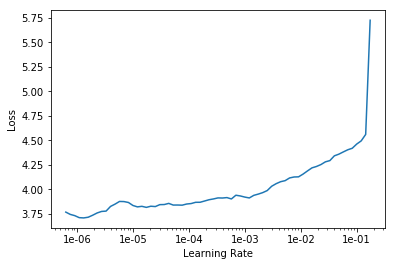

In [82]:
learn.recorder.plot()

In [ ]:
#lr = 3e-2
do_fit('myFace-Generator-256b', slice(1e-5, 3e-1), epochs=200)

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,3.884543,2.672139,0.711544,0.193686,0.225873,0.214890,0.234460,0.382498,0.709186,00:46
1,3.846864,2.535347,0.654624,0.185725,0.209071,0.201262,0.232627,0.388048,0.663988,00:47
2,3.769190,2.472572,0.636523,0.181931,0.205751,0.201818,0.219492,0.362445,0.664613,00:47
3,3.736826,2.795253,0.792454,0.201059,0.232662,0.215389,0.255496,0.419921,0.678271,00:48
4,3.676614,2.387586,0.579903,0.172553,0.195008,0.190934,0.215861,0.379141,0.654186,00:48
5,3.690578,2.526083,0.645684,0.179976,0.202117,0.211094,0.219034,0.350505,0.717673,00:48
6,3.644293,2.495264,0.673860,0.180459,0.200998,0.194899,0.224715,0.363814,0.656519,00:48
7,3.672501,2.367998,0.598185,0.174195,0.194843,0.196796,0.214593,0.346298,0.643088,00:48
8,3.640376,2.584332,0.640413,0.182993,0.205349,0.208261,0.229182,0.392764,0.725371,00:48
9,3.604103,2.319366,0.594989,0.174404,0.191789,0.188032,0.200705,0.327801,0.641647,00:48


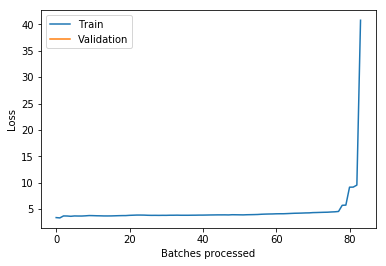

In [81]:
learn.recorder.plot_losses()

In [ ]:
bs = 

In [222]:
gc.collect()
data = get_data(6,size*2)

In [77]:
data.valid_ds.items
# filepaths for original imgs

array([PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/64.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/481.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/20.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/75.png'), ...,
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/236.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/309.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/31.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/260.png')],
      dtype=object)

# Using Model

Load model and use on facial landmark frames

In [99]:
len(learn.data.train_ds.items)

486

In [ ]:
#need to update these paths, use imagenet_stats for normalization? Why 3 classes?
data_mr = (ImageImageList.from_folder(path_mr).split_by_rand_pct(0.1, seed=42)
          .label_from_func(lambda x: path_hr/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_mr.c = 3

In [ ]:
fn = data_mr.valid_ds.x.items[0];
img = open_image(fn); img.shape
p,img_hr,b = learn.predict(img)
show_image(img, figsize=(18,15), interpolation='nearest');

In [54]:
learn.predict(y_hat_train)

AttributeError: 'numpy.ndarray' object has no attribute 'apply_tfms'

In [43]:
il.items[0]

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/training/304.png')

In [ ]:
# defaults.cmap='binary'

In [44]:
il

ImageList (564 items)
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace

In [55]:
il

ImageList (564 items)
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace

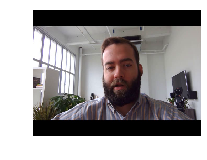

In [54]:
il[0].show()
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

In [104]:
type(data)

fastai.vision.data.ImageDataBunch

### Refactor

In [ ]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [ ]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.228332,0.206325,0.937500
2,0.189966,0.192558,0.940800
3,0.156765,0.092810,0.969100
4,0.135871,0.083914,0.973300
5,0.108844,0.071582,0.978000
6,0.105887,0.128586,0.960200
7,0.080699,0.052754,0.983200
8,0.066007,0.037588,0.988600
9,0.047513,0.030255,0.990200
10,0.044705,0.028373,0.991600


### Resnet-ish

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [3]:
help(conv_layer)

Help on function conv_layer in module fastai.layers:

conv_layer(ni: int, nf: int, ks: int = 3, stride: int = 1, padding: int = None, bias: bool = None, is_1d: bool = False, norm_type: Union[fastai.layers.NormType, NoneType] = <NormType.Batch: 1>, use_activ: bool = True, leaky: float = None, transpose: bool = False, init: Callable = <function kaiming_normal_ at 0x7f0ab4821bf8>, self_attention: bool = False)
    Create a sequence of convolutional (`ni` to `nf`), ReLU (if `use_activ`) and batchnorm (if `bn`) layers.



In [ ]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **kwargs)
    Resnet block of `nf` features.



In [ ]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [ ]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


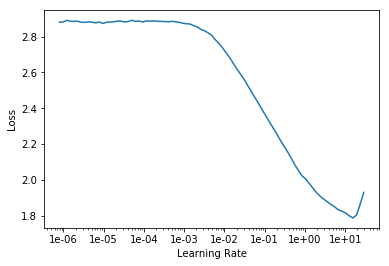

In [ ]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.248807,0.121582,0.972800
2,0.120927,0.360583,0.890300
3,0.104013,0.074916,0.977800
4,0.081181,0.065717,0.980000
5,0.068514,0.096448,0.967200
6,0.061274,0.087955,0.971800
7,0.051673,0.033911,0.989400
8,0.048090,0.033234,0.988800
9,0.039095,0.024638,0.992400
10,0.023670,0.021215,0.993400


In [ ]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________

## fin